<AxesSubplot:xlabel='Datetime'>

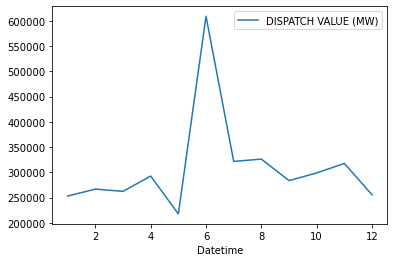

In [1]:
import pandas as pd
import numpy as np
import time
import glob
filenames = sorted(glob.glob('NEMLOG*.csv'))
filenames = filenames[0:2]
data = pd.concat([pd.read_csv(f, skipfooter = 1, engine='python') for f in filenames])
data.columns=['Datetime','DISPATCH VALUE (MW)']
data.index = pd.to_datetime(data['Datetime'])
data=data[['DISPATCH VALUE (MW)']].groupby(data.index.month).sum().round(1)
data.plot()

In [2]:
import pandas as pd
import numpy as np
import time
import glob
filenames = sorted(glob.glob('NEMLOG*.csv'))
filenames = filenames[0:2]
data = pd.concat([pd.read_csv(f, skipfooter = 1, engine='python') for f in filenames])
data.columns=['Datetime','DISPATCH VALUE (MW)']
data.index = pd.to_datetime(data['Datetime'])
data=data[['DISPATCH VALUE (MW)']].groupby(data.index.hour).sum().round(1)
data

,DISPATCH VALUE (MW)
Datetime,
0,199578.5
1,199272.1
2,195203.5
3,189222.3
4,184411.8
5,181625.5
6,181647.9
7,180043.0
8,163853.2


<AxesSubplot:xlabel='Datetime'>

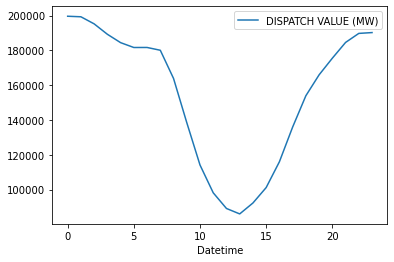

In [3]:
data.plot()

Text(0, 0.5, 'Wind Speed (m/s)')

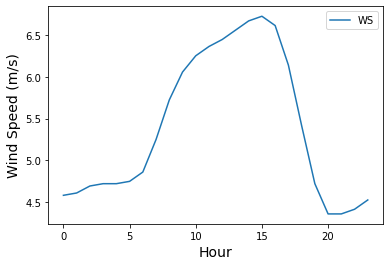

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
df=pd.read_csv('HM01X_Data_018116_999999999907064.txt', usecols = ['Year Month Day Hour Minutes in YYYY.1', 'MM.1', 'DD.1', 'HH24.1',
       'MI format in Local standard time', 'Air Temperature in degrees C', 'Wind speed in km/h', 'Wind direction in degrees true'], low_memory=False)
df = df.apply(pd.to_numeric, errors = 'coerce')
df.columns =["year", "month", "day", "hour", "minute", "Temp", "WS", "WD"]
df.interpolate(method='polynomial', order=2)
df[(df['WS'] > 3)]
df.index = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
ave=df[['WS']].groupby(df.index.hour).mean().round(1)/3.6
ave.plot()
plt.xlabel('Hour', size=14)                                                     
plt.ylabel('Wind Speed (m/s)', size=14)  

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
df=pd.read_csv('HM01X_Data_018116_999999999907064.txt', usecols = ['Year Month Day Hour Minutes in YYYY.1', 'MM.1', 'DD.1', 'HH24.1',
       'MI format in Local standard time', 'Air Temperature in degrees C', 'Wind speed in km/h', 'Wind direction in degrees true'], low_memory=False)
df = df.apply(pd.to_numeric, errors = 'coerce')
df.columns =["year", "month", "day", "hour", "minute", "Temp", "WS", "WD"]
df.interpolate(method='polynomial', order=2)
df[(df['WS'] > 3)]
df.index = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
ave=df[['WS']].groupby(df.index.month).mean().round(1)/3.6
ave.round(2)

,WS
1,5.89
2,5.56
3,5.22
4,4.86
5,5.08
6,5.11
7,5.47
8,5.42
9,5.56
10,5.44


In [6]:
df['WS'].isna().sum()

139369

Text(0, 0.5, 'Wind Speed (km/h)')

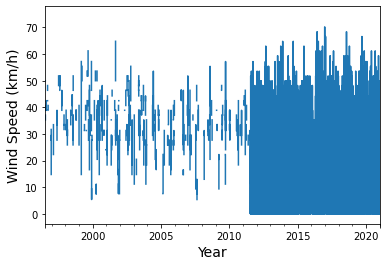

In [7]:
df['WS'].plot()
plt.xlabel('Year', size=14)                                                     
plt.ylabel('Wind Speed (km/h)', size=14)   

Text(0, 0.5, 'Wind Speed (m/s)')

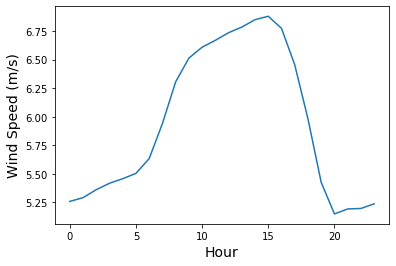

In [8]:
import matplotlib.pyplot as plt
df.interpolate(method='polynomial', order=2)
mean_WS=df.WS/3.6
ave1 = mean_WS.loc[mean_WS > 3]
ave1=ave1.groupby(ave1.index.hour).mean()
ave1.plot()
plt.xlabel('Hour', size=14)                                                     
plt.ylabel('Wind Speed (m/s)', size=14)   

In [9]:
# Define the column label of the wind speed data of interest. Available choices are:
# 'SPD_15_COMB_AVG', 'SPD_47_COMB_AVG', 'SPD_32_COMB_AVG', 'SPD_59_COMB_AVG'.
#column = 'SPD_32_COMB_AVG'

# Calculate and return the wind speed statistics for our wind speed dataset of choice, using 
# the DataFrame.describe() attribute, assign the output to a new variable called 'WS_stats'.
WS_stats = df['WS'].describe()

# Calculate the value of k, the Weibull Shape parameter, using the equations presented earlier 
# and the standard deviation and mean values of the wind speed dataset i.e. the 'std' and 'mean' 
# entries of the WS_stats variable.
k_eqn = (WS_stats['std']/WS_stats['mean'])**(-1.086)

# Calculate the value of c, the Weibull Scale parameter, using the equations presented earlier
# and the mean value of the wind speed dataset.
c_eqn = WS_stats['mean']*(0.568+0.433/k_eqn)**(-1/k_eqn)

# Print out the calculated values of c and k, and the mean wind speed, rounded to 2 decimal places
# by using pythons inbuilt function round().
print ('mean:', round(WS_stats['mean'],2))
print ('c:', round(c_eqn,2))
print ('k:', round(k_eqn,2))

mean: 19.42
c: 21.94
k: 2.22


In [10]:
# Define a function to plot u (the wind speed or the value of 'c') using the log law, given inputs of 
# z (height), z_0 (roughness height), u_ref (the reference wind speed or value of 'c') and z_ref (reference height).
def func_log(z, z_0, u_ref, z_ref):
    return u_ref*np.log(z/z_0)/np.log(z_ref/z_0)
z_0 = 0.1
alpha = 0.2
yvals = np.arange(1, 120, 1)
x_log = func_log(100, z_0, 0.04, 10)
#plt.plot(x_log, yvals, label='Modelled Log Law')
x_log

0.06

Text(0, 0.5, 'Wind Speed (m/s)')

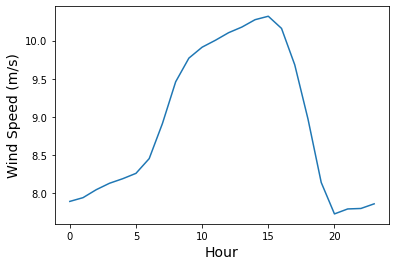

In [11]:
import numpy as np
import matplotlib.pyplot as plt
z=100
z_0=0.1
z_ref=10
v_hub = ave1*np.log(z/z_0)/np.log(z_ref/z_0)
v_hub.plot()
P_A = 1/2 *1.2 *(v_hub**3)/pow((0.568 + 0.433/2.22),(-3/2.22))
plt.xlabel('Hour', size=14)                                                     
plt.ylabel('Wind Speed (m/s)', size=14)  

In [12]:
import pandas as pd

# create the Wind_Power_df data frame with the same shape as the other data frames
Wind_Power_df = pd.DataFrame(index=ave1.index, columns=['Wind Power (W)'])

# concatenate the data frames
df1 = pd.concat([ave1, v_hub, P_A], axis=1, join='inner')
df1.columns = ['WS at 10 (m)', 'WS at 100 (m)', 'Wind Power potential (W/m2)']

# calculate the wind power in watts
def wind_power(wind_power_potential, wind_speed, air_density, blade_area, power_coefficient):
    wind_power = wind_power_potential * blade_area
    wind_power_watts = 0.5 * air_density * blade_area * (wind_speed ** 3) * power_coefficient
    return wind_power_watts

# air density in kg/m^3
air_density = 1.225

# blade area in m^2
blade_area = 50

# power coefficient
power_coefficient = 0.45

# calculate the wind power in watts and add it as a new column in the data frame
df1['Wind Power (W)'] = wind_power(df1['Wind Power potential (W/m2)'], df1['WS at 10 (m)'], air_density, blade_area, power_coefficient)

# set the index name and save the data frame to an Excel file
df1.index.name = 'Hour'
df1.to_excel('Wind data.xlsx')
df1


,WS at 10 (m),WS at 100 (m),Wind Power potential (W/m2),Wind Power (W)
Hour,,,,
0,5.256679,7.885019,204.100220,2001.810828
1,5.289586,7.934379,207.957263,2039.640628
2,5.359578,8.039368,216.322118,2121.682956
3,5.415857,8.123785,223.208393,2189.223399
4,5.455809,8.183714,228.184717,2238.031091
5,5.502806,8.254209,234.132447,2296.366301
6,5.632073,8.448109,251.023147,2462.029942
7,5.939671,8.909507,294.439626,2887.857899
8,6.305743,9.458614,352.304143,3455.391906


In [13]:
import numpy as np
import pandas as pd
import time
import glob
filenames = sorted(glob.glob('20*.csv'))
filenames = filenames[0:21]
#for f in filenames:
data = pd.concat([pd.read_csv(f, usecols=[1,2],skiprows = 4, header = None, skipfooter = 1, engine='python') for f in filenames])
data.columns=['Datetime','GHI (W/m2)']
data.to_csv( "solar_irradiance_combine.csv", index=False, encoding='utf-8-sig')
data.index = pd.to_datetime(data['Datetime'])
data=data[['GHI (W/m2)']].groupby(data.index.hour).mean().round(1)
data

,GHI (W/m2)
Datetime,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.5
6,32.5
7,159.0
8,335.7


In [14]:
import numpy as np
import pandas as pd
import time
import glob
filenames = sorted(glob.glob('20*.csv'))
filenames = filenames[0:21]
#for f in filenames:
data1 = pd.concat([pd.read_csv(f, usecols=[1,2],skiprows = 4, header = None, skipfooter = 1, engine='python') for f in filenames])
data1.columns=['Datetime','GHI (W/m2)']
data1.index = pd.to_datetime(data1['Datetime'])
data1=data1[['GHI (W/m2)']].groupby(data1.index.hour).mean().round(1)
data1

,GHI (W/m2)
Datetime,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.5
6,32.5
7,159.0
8,335.7


In [15]:
import numpy as np
import pandas as pd
import time
import glob
filenames = sorted(glob.glob('temp*.csv'))
filenames = filenames[0:21]
#for f in filenames:
temp = pd.concat([pd.read_csv(f, usecols=[1,2],skiprows = 4, header = None, skipfooter = 1, engine='python') for f in filenames])
temp.columns=['Datetime','Temperature']
temp.index = pd.to_datetime(temp['Datetime'])
temp=temp[['Temperature']].groupby(temp.index.month).mean().round(1)
temp

,Temperature
Datetime,
1,24.0
2,23.4
3,21.0
4,17.9
5,13.9
6,11.0
7,10.3
8,11.2
9,13.9


In [16]:
data1

,GHI (W/m2)
Datetime,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.5
6,32.5
7,159.0
8,335.7


In [17]:
import pandas as pd

# create the Wind_Power_df data frame with the same shape as the other data frames
Wind_Power_df = pd.DataFrame(index=ave1.index, columns=['Wind Power (W)'])

# concatenate the data frames
df1 = pd.concat([ave1, v_hub, P_A], axis=1, join='inner')
df1.columns = ['WS at 10 (m)', 'WS at 100 (m)', 'Wind Power potential (W/m2)']

# calculate the wind power in watts
def wind_power(wind_power_potential, wind_speed, air_density, blade_area, power_coefficient):
    wind_power = wind_power_potential * blade_area
    wind_power_watts = 0.5 * air_density * blade_area * (wind_speed ** 3) * power_coefficient
    return wind_power_watts

# air density in kg/m^3
air_density = 1.225

# blade area in m^2
blade_area = 50

# power coefficient
power_coefficient = 0.45

# calculate the wind power in watts and add it as a new column in the data frame
df1['Wind Power (W)'] = wind_power(df1['Wind Power potential (W/m2)'], df1['WS at 10 (m)'], air_density, blade_area, power_coefficient)

In [18]:
pow((0.568 + 0.433/2.22),(-3/2.22))

1.4411725371518906

,GHI [MERRA-2],WPD [BoM AWS]
0,0.0,204.100220
1,0.0,207.957263
2,0.0,216.322118
3,0.0,223.208393
4,0.0,228.184717
5,0.5,234.132447
6,32.5,251.023147
7,159.0,294.439626
8,335.7,352.304143
9,506.0,388.289532


Text(0, 0.5, 'Power (W/m$^2$)')

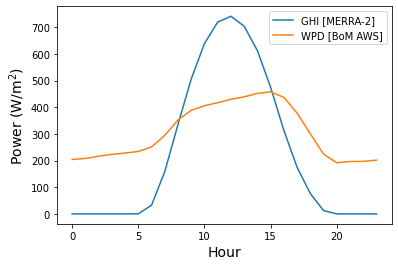

In [19]:
import matplotlib.pyplot as plt
result = pd.concat([data1, df1['Wind Power potential (W/m2)']], axis=1, join='inner')
result.columns=['GHI [MERRA-2]', 'WPD [BoM AWS]']
display(result)
result.plot()
plt.xlabel('Hour', size=14)                                                     
plt.ylabel('Power (W/m$^2$)', size=14)  

In [20]:
result.to_csv( "Wind and solar.csv", index=False, encoding='utf-8-sig')

In [21]:
corr = result.corr(method='kendall')
corr

,GHI [MERRA-2],WPD [BoM AWS]
GHI [MERRA-2],1.000000,0.769316
WPD [BoM AWS],0.769316,1.000000


In [22]:
import scipy.stats as stats
stats.kendalltau(result['GHI [MERRA-2]'], result['WPD [BoM AWS]'])

KendalltauResult(correlation=0.7693164667982588, pvalue=4.2710191295235615e-07)

In [23]:
result.corr()

,GHI [MERRA-2],WPD [BoM AWS]
GHI [MERRA-2],1.000000,0.912839
WPD [BoM AWS],0.912839,1.000000


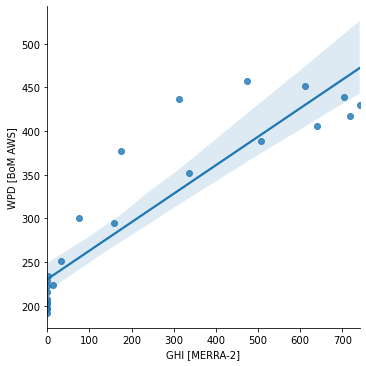

In [24]:
import seaborn as sns
sns.lmplot(x="GHI [MERRA-2]", y="WPD [BoM AWS]", data=result)

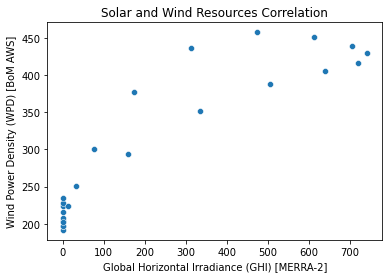

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="GHI [MERRA-2]", y="WPD [BoM AWS]", data=result)

plt.title("Solar and Wind Resources Correlation")
plt.xlabel("Global Horizontal Irradiance (GHI) [MERRA-2]")
plt.ylabel("Wind Power Density (WPD) [BoM AWS]")

plt.show()


In [26]:
corr = result.corr(method='kendall')
corr

,GHI [MERRA-2],WPD [BoM AWS]
GHI [MERRA-2],1.000000,0.769316
WPD [BoM AWS],0.769316,1.000000


In [27]:
corr = result.corr(method='pearson')
corr

,GHI [MERRA-2],WPD [BoM AWS]
GHI [MERRA-2],1.000000,0.912839
WPD [BoM AWS],0.912839,1.000000


In [28]:
import pandas as pd
load_data=pd.read_csv('Zone Sub Report - Eyre Peninsula - 20201016.csv',skiprows=3, usecols=[0,1,4])
load_data.columns=['Date','Time','MVA']
load_data['Datetime']=load_data['Date']+ ' '+load_data['Time']
load_data.index = pd.to_datetime(load_data['Datetime'])
load_data=load_data[['MVA']].groupby(load_data.index.hour).mean().round(1)
load_data
#load_data.plot()

,MVA
Datetime,
0,2.8
1,2.5
2,2.2
3,2.0
4,1.9
5,1.9
6,1.9
7,2.1
8,2.3


In [29]:
import pandas as pd
load_data=pd.read_csv('Zone Sub Report - Eyre Peninsula - 20201016.csv',skiprows=3, usecols=[0,1,4])
load_data.columns=['Date','Time','MVA']
load_data['Datetime']=load_data['Date']+ ' '+load_data['Time']
load_data.index = pd.to_datetime(load_data['Datetime'])
load_data=load_data[['MVA']].groupby(load_data.index.hour).mean().round(1)
load_data=load_data
load_data

,MVA
Datetime,
0,2.8
1,2.5
2,2.2
3,2.0
4,1.9
5,1.9
6,1.9
7,2.1
8,2.3


In [30]:
import pandas as pd
import numpy as np
import time
import glob
filenames = sorted(glob.glob('NEMLOG*.csv'))
filenames = filenames[0:2]
data = pd.concat([pd.read_csv(f, skipfooter = 1, engine='python') for f in filenames])
data.columns=['Datetime','DISPATCH VALUE (MW)']
data.index = pd.to_datetime(data['Datetime'])
data=data[['DISPATCH VALUE (MW)']].groupby(data.index.hour).mean().round(1)
data

,DISPATCH VALUE (MW)
Datetime,
0,21.1
1,21.0
2,20.6
3,20.0
4,19.5
5,19.2
6,19.2
7,19.0
8,17.3


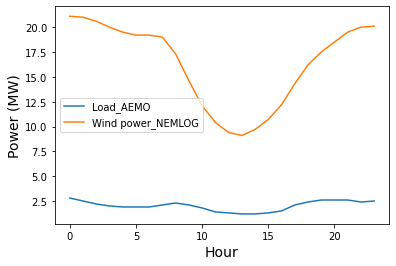

In [31]:
import matplotlib.pyplot as plt
new=pd.concat([load_data, data], axis=1, join='inner')
new.columns=['Load_AEMO','Wind power_NEMLOG']
new.plot()
plt.xlabel('Hour', size=14)                                                     
plt.ylabel('Power (MW)', size=14)
plt.legend(loc='best')

Text(0, 0.5, 'Power (MW)')

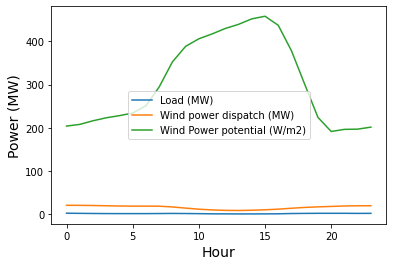

In [32]:
import matplotlib.pyplot as plt
new=pd.concat([load_data, data, df1['Wind Power potential (W/m2)']], axis=1, join='inner')
new.columns=['Load (MW)','Wind power dispatch (MW)', 'Wind Power potential (W/m2)']
new.plot()
plt.xlabel('Hour', size=14)                                                     
plt.ylabel('Power (MW)', size=14)

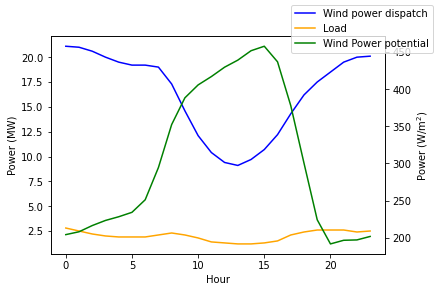

In [33]:
import matplotlib.pyplot as plt
dt={'GHI (W/m$^2$)': [577.2, 535.4, 464.0, 371.8, 315.7, 271.8, 291.7, 335.2, 424.4, 493.8, 535.4, 559.6]}
GHI = pd.DataFrame(dt)
new=pd.concat([load_data, data, GHI], axis=1, join='inner')
new.columns=['Load (MW)','Wind power dispatch (MW)', 'GHI (W/m2)']
# Create Plot

fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Hour') 
ax1.set_ylabel('Power (MW)') 
plot_1 = ax1.plot(data, color = 'blue',label="Wind power dispatch") 
plot_3 = ax1.plot(load_data, color = 'orange',label="Load") 
ax1.tick_params(axis ='y')
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.set_ylabel('Power (W/m$^2$)') 
plot_2 = ax2.plot(df1['Wind Power potential (W/m2)'], color = 'green', label="Wind Power potential") 
ax2.tick_params(axis ='y') 
fig.legend(loc="upper right")

Text(0, 0.5, 'Power (MW)')

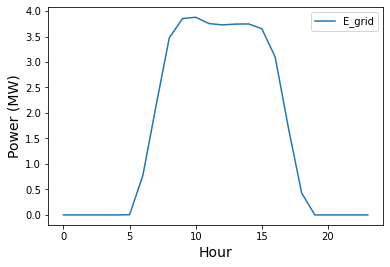

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
PV_grid=pd.read_csv("Mangalo_Project_VC1_HourlyRes_0.csv", skiprows=12, usecols=[0,1], header = None, skipfooter = 1, engine = 'python')
PV_grid.columns=['Datetime','E_grid']
PV_grid.index = pd.to_datetime(PV_grid['Datetime'])
PV_grid.dropna()
PV_grid.drop('Datetime', axis = 1, inplace = True)
PV_grid=PV_grid[['E_grid']].groupby(PV_grid.index.hour).mean().round(1)/1000
PV_grid.plot()
plt.xlabel('Hour', size=14)                                                     
plt.ylabel('Power (MW)', size=14)

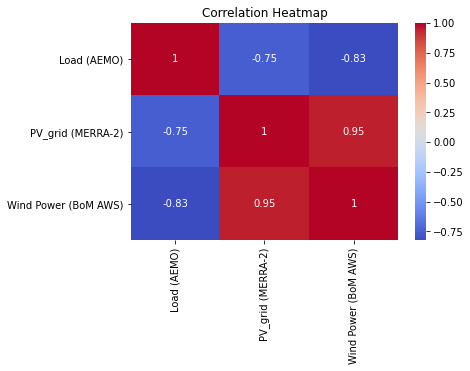

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

new=pd.concat([load_data, PV_grid, df1['Wind Power (W)']/1000], axis=1, join='inner')
new.columns=['Load (AEMO)','PV_grid (MERRA-2)', 'Wind Power (BoM AWS)']

sns.heatmap(new.corr(), cmap='coolwarm', annot=True)

plt.title('Correlation Heatmap')
plt.show()


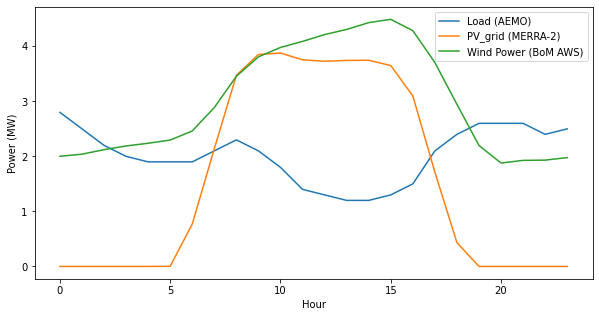

    Load (AEMO)  PV_grid (MERRA-2)  Wind Power (BoM AWS)
0           2.8            -0.0001              2.001811
1           2.5            -0.0001              2.039641
2           2.2            -0.0001              2.121683
3           2.0            -0.0001              2.189223
4           1.9            -0.0001              2.238031
5           1.9             0.0035              2.296366
6           1.9             0.7709              2.462030
7           2.1             2.1402              2.887858
8           2.3             3.4736              3.455392
9           2.1             3.8512              3.808336
10          1.8             3.8778              3.978914
11          1.4             3.7540              4.089085
12          1.3             3.7277              4.213002
13          1.2             3.7436              4.306200
14          1.2             3.7462              4.430488
15          1.3             3.6505              4.489563
16          1.5             3.0

In [47]:
import matplotlib.pyplot as plt
new=pd.concat([load_data, PV_grid, df1['Wind Power (W)']/1000], axis=1, join='inner')
new.columns=['Load (AEMO)','PV_grid (MERRA-2)', 'Wind Power (BoM AWS)']

new.plot(figsize=(10,5))
plt.xlabel('Hour')
plt.ylabel('Power (MW)')
plt.show()
print(new)

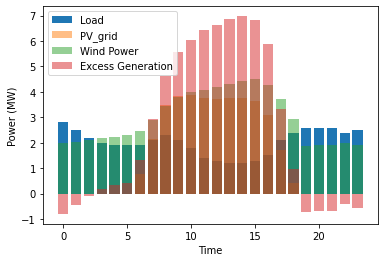

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data as a Pandas DataFrame
data = pd.DataFrame({
    'Load': [2.8, 2.5, 2.2, 2.0, 1.9, 1.9, 1.9, 2.1, 2.3, 2.1, 1.8, 1.4, 1.3, 1.2, 1.2, 1.3, 1.5, 2.1, 2.4, 2.6, 2.6, 2.6, 2.4, 2.5],
    'PV_grid': [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, 0.0035, 0.7709, 2.1402, 3.4736, 3.8512, 3.8778, 3.7540, 3.7277, 3.7436, 3.7462, 3.6505, 3.0984, 1.7126, 0.4325, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001],
    'Wind Power': [2.001811, 2.039641, 2.121683, 2.189223, 2.238031, 2.296366, 2.462030, 2.887858, 3.455392, 3.808336, 3.978914, 4.089085, 4.213002, 4.306200, 4.430488, 4.489563, 4.284073, 3.705406, 2.945926, 1.879134, 1.927215, 1.931919, 1.977699, 1.931919]
})

# Calculate the excess generation
data['Excess Generation'] =  data['PV_grid'] + data['Wind Power'] - data['Load'] 

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(data.index, data['Load'], label='Load')
ax.bar(data.index, data['PV_grid'], label='PV_grid', alpha=0.5)
ax.bar(data.index, data['Wind Power'], label='Wind Power', alpha=0.5)
ax.bar(data.index, data['Excess Generation'], label='Excess Generation', alpha=0.5)
ax.legend()

# Add labels to the x and y axis
plt.xlabel('Time')
plt.ylabel('Power (MW)')

plt.show()


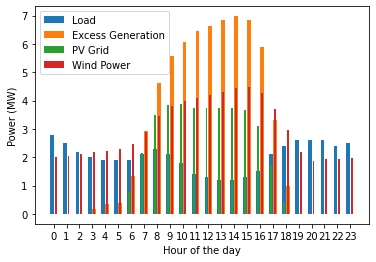

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Data
load = [2.8, 2.5, 2.2, 2.0, 1.9, 1.9, 1.9, 2.1, 2.3, 2.1, 1.8, 1.4, 1.3, 1.2, 1.2, 1.3, 1.5, 2.1, 2.4, 2.6, 2.6, 2.6, 2.4, 2.5]
pv_grid = [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, 0.0035, 0.7709, 2.1402, 3.4736, 3.8512, 3.8778, 3.7540, 3.7277, 3.7436, 3.7462, 3.6505, 3.0984, 1.7126, 0.4325, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001]
wind = [2.001811, 2.039641, 2.121683, 2.189223, 2.238031, 2.296366, 2.462030, 2.887858, 3.455392, 3.808336, 3.978914, 4.089085, 4.213002, 4.306200, 4.430488, 4.489563, 4.284073, 3.705406, 2.945926, 2.197603, 1.879134, 1.927215, 1.931919, 1.977699]

# Calculating excess generation
excess = np.array(pv_grid) + np.array(wind) - np.array(load)
excess[excess < 0] = 0

# Plotting
fig, ax = plt.subplots()
x = np.arange(len(load))
width = 0.3
rects1 = ax.bar(x - width/2, load, width, label='Load')
rects2 = ax.bar(x + width/2, excess, width, label='Excess Generation')
ax.bar(x - width/2, pv_grid, width/2, label='PV Grid')
ax.bar(x + width/2, wind, width/2, label='Wind Power')
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in range(24)])
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Power (MW)')
ax.legend()

plt.show()


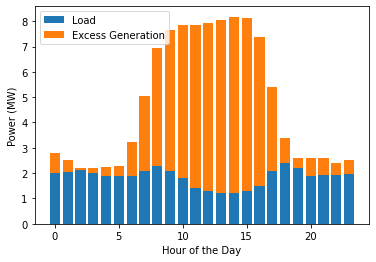

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe with the data
data = {'Load (AEMO)': [2.8, 2.5, 2.2, 2.0, 1.9, 1.9, 1.9, 2.1, 2.3, 2.1, 1.8, 1.4, 1.3, 1.2, 1.2, 1.3, 1.5, 2.1, 2.4, 2.6, 2.6, 2.6, 2.4, 2.5],
        'PV_grid (MERRA-2)': [-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, 0.0035, 0.7709, 2.1402, 3.4736, 3.8512, 3.8778, 3.754, 3.7277, 3.7436, 3.7462, 3.6505, 3.0984, 1.7126, 0.4325, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001],
        'Wind Power (BoM AWS)': [2.001811, 2.039641, 2.121683, 2.189223, 2.238031, 2.296366, 2.46203, 2.887858, 3.455392, 3.808336, 3.978914, 4.089085, 4.213002, 4.3062, 4.430488, 4.489563, 4.284073, 3.705406, 2.945926, 2.197603, 1.879134, 1.927215, 1.931919, 1.977699]}

df = pd.DataFrame(data)

# Calculate the excess generation
df['Excess Generation'] = df['PV_grid (MERRA-2)'] + df['Wind Power (BoM AWS)'] - df['Load (AEMO)']

# Set the index of the dataframe to be the hours of the day
df.index.name = 'Hour'
df = df.reset_index()

# Plot the stacked bar chart
plt.bar(df['Hour'], df['Load (AEMO)'], label='Load')
plt.bar(df['Hour'], df['Excess Generation'], bottom=df['Load (AEMO)'], label='Excess Generation')
plt.ylabel('Power (MW)')
plt.xlabel('Hour of the Day')
plt.legend()
plt.show()


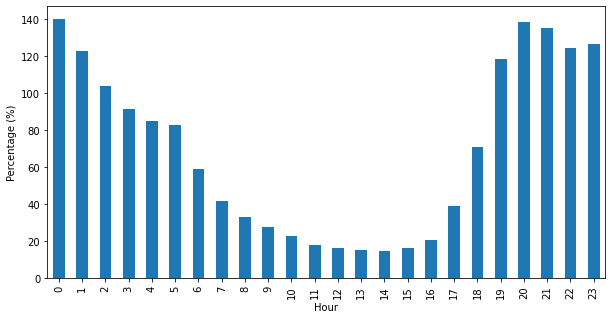

        Load %  Total PV and Wind
0   139.880344           2.001711
1   122.576622           2.039541
2   103.696157           2.121583
3    91.360770           2.189123
4    84.899844           2.237931
5    82.613498           2.299866
6    58.770219           3.232930
7    41.765629           5.028058
8    33.193862           6.928992
9    27.416805           7.659536
10   22.910342           7.856714
11   17.850120           7.843085
12   16.371349           7.940702
13   14.907203           8.049800
14   14.675869           8.176688
15   15.970392           8.140063
16   20.318395           7.382473
17   38.759644           5.418006
18   71.038991           3.378426
19  118.316116           2.197503
20  138.368956           1.879034
21  134.916714           1.927115
22  124.235267           1.931819
23  126.415919           1.977599


In [49]:
import matplotlib.pyplot as plt
new=pd.concat([load_data, PV_grid, df1['Wind Power (W)']/1000], axis=1, join='inner')
new.columns=['Load (AEMO)','PV_grid (MERRA-2)', 'Wind Power (BoM AWS)']

# Calculate percentage of load over total sum of PV and wind power
total_pv_wind_sum = new[['PV_grid (MERRA-2)', 'Wind Power (BoM AWS)']].sum(axis=1)
load_percentages = (new['Load (AEMO)'] / total_pv_wind_sum) * 100

# Plot the data
load_percentages.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Hour')
plt.ylabel('Percentage (%)')
plt.show()
# Create a table of load percentages and total PV and wind power
table_data = pd.concat([load_percentages, total_pv_wind_sum], axis=1, keys=['Load %', 'Total PV and Wind'])

# Print the table
print(table_data)

KeyError: 'Wind Power potential (W/m$^2$)'

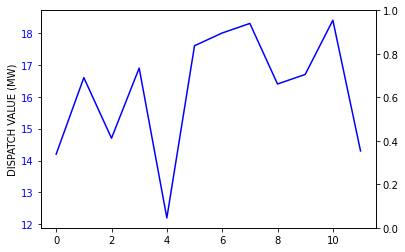

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data as a pandas DataFrame
data = pd.DataFrame({
    'DISPATCH VALUE (MW)': [14.2, 16.6, 14.7, 16.9, 12.2, 17.6, 18.0, 18.3, 16.4, 16.7, 18.4, 14.3],
    'Wind Power (MW)': [137.760849, 145.365605, 147.961359, 147.961359, 150.587831, 161.404520, 203.323211, 263.271113, 312.011807, 343.043427, 361.666260, 376.067240],
    'Pv_grid(MW)': [577.2, 535.4, 464.0, 371.8, 315.7, 271.8, 291.7, 335.2, 424.4, 493.8, 535.4, 559.6]
})

# Create a figure and axis objects
fig, ax1 = plt.subplots()

# Plot the first y-axis
ax1.plot(data['DISPATCH VALUE (MW)'], color='b')
ax1.set_ylabel('DISPATCH VALUE (MW)')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second y-axis
ax2.plot(data['Wind Power potential (W/m$^2$)'], color='r')
ax2.set_ylabel('Wind Power potential (W/m$^2$)')

#Plot GHI
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
data['GHI (W/m$^2$)'].plot(ax=ax3, color='g')
ax3.set_ylabel('GHI')

# Set the x-axis label
ax1.set_xlabel('Time')


# Show the plot
plt.show()
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()

plt.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc=0)

In [ ]:
new

In [ ]:
#Load data
import pandas as pd
load_data=pd.read_csv('Zone Sub Report - Eyre Peninsula - 20201016.csv',skiprows=3, usecols=[0,1,4])
load_data.columns=['Date','Time','MVA']
load_data['Datetime']=load_data['Date']+ ' '+load_data['Time']
load_data.index = pd.to_datetime(load_data['Datetime'])
load_data=load_data[['MVA']].groupby(load_data.index.hour).mean().round(1)
load_data=load_data
load_data


In [ ]:
#PV grid
import pandas as pd
PV_grid=pd.read_csv("Mangalo_Project_VC1_HourlyRes_0.csv", skiprows=12, usecols=[0,1], header = None, skipfooter = 1, engine = 'python')
PV_grid.columns=['Datetime','E_grid']
PV_grid.index = pd.to_datetime(PV_grid['Datetime'])
PV_grid.dropna()
PV_grid.drop('Datetime', axis = 1, inplace = True)
PV_grid=PV_grid[['E_grid']].groupby(PV_grid.index.hour).mean().round(1)/1000
PV_grid.plot()

In [ ]:
#wind power dispatch generation
import pandas as pd
import numpy as np
import time
import glob
filenames = sorted(glob.glob('NEMLOG*.csv'))
filenames = filenames[0:2]
data = pd.concat([pd.read_csv(f, skipfooter = 1, engine='python') for f in filenames])
data.columns=['Datetime','DISPATCH VALUE (MW)']
data.index = pd.to_datetime(data['Datetime'])
data=data[['DISPATCH VALUE (MW)']].groupby(data.index.hour).mean().round(1)
data

In [ ]:
import pandas as pd
curtailed_data=pd.read_csv('curtailment_data.csv')
curtailed_data.index = pd.to_datetime(curtailed_data['Time'])
curtailed_data=curtailed_data.groupby(curtailed_data.index.hour).sum().round(1)
curtailed_data

In [ ]:
import matplotlib.pyplot as plt
new=pd.concat([load_data, data, PV_grid['E_grid']], axis=1, join='inner')
new.columns=['Load (MW)','Wind power dispatch (MW)', 'PV_grid (MW)']
new['PV_grid (MW)'] = new['PV_grid (MW)'].replace(-0.0001, 0)
# Create Plot
fig, ax1 = plt.subplots()   
ax1.set_xlabel('Hour') 
ax1.set_ylabel('Power (MW)') 
plot_1 = ax1.plot(data, color = 'blue',label="Wind_grid") 
plot_3 = ax1.plot(load_data, color = 'orange',label="Load") 
plot_2 = ax1.plot(PV_grid['E_grid'], color = 'green', label="PV_grid") 
ax1.tick_params(axis ='y')
# Adding Twin Axes
#ax2 = ax1.twinx() 
#ax2.set_ylabel('Power (W/m$^2$)') 
#ax2.tick_params(axis ='y') 
fig.legend(loc="upper left")
new['RE curtailed']=new['Wind power dispatch (MW)']+new['PV_grid (MW)']-new['Load (MW)']
new

In [ ]:
#read curtailment data
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
curtailed_data=pd.read_excel('curtailment data.xlsx')
ax.bar(curtailed_data['Date'],curtailed_data['Curtailment (MWh)'])
curtailed_data.index = pd.to_datetime(curtailed_data['Date'])
curtailed_data=curtailed_data.groupby(curtailed_data.index.month).sum().round(1)
curtailed_data

In [ ]:
corr = new.corr(method='kendall')
corr

In [ ]:
import matplotlib.pyplot as plt
# Plot
x=new['Load (MW)']
y1=new['Wind power dispatch (MW)']
y2=new['PV_grid (MW)']
plt.scatter(x,y1,marker= '*',color='blue', label='Wind power')
plt.scatter(x,y2, marker='v',color= 'red', label='PV_grid')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
# Decorate
plt.title('Correlation PV & Wind vs Load')
plt.xlabel('Load(MW)')
plt.ylabel('Power(MW)')
plt.legend(loc='best')
plt.show()

In [ ]:
import scipy.stats
scipy.stats.pearsonr(new['Load (MW)'], new['Wind power dispatch (MW)'])

In [ ]:
new['Wind power dispatch (MW)'].corr(new['Load (MW)'])

In [ ]:
import seaborn as sns
sns.lmplot(x="Load (MW)", y="Wind power dispatch (MW)", data=new)

In [ ]:
import seaborn as sns
sns.lmplot(x="Wind Power potential (W/m2)", y="Wind power dispatch (MW)", data=new)

In [ ]:
import scipy.stats
scipy.stats.pearsonr(new['Wind Power potential (W/m2)'], new['Wind power dispatch (MW)'])

In [ ]:
#read JSON file
import json
  
# Opening JSON file
f = open('Unit Curtailment, Availability and Share for Period-1667549894491.json')
# returns JSON object as 
# a dictionary
data = json.load(f)
data

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
df=pd.read_csv('HM01X_Data_018116_999999999907064.txt', usecols = ['Year Month Day Hour Minutes in YYYY.1', 'MM.1', 'DD.1', 'HH24.1',
       'MI format in Local standard time', 'Air Temperature in degrees C', 'Wind speed in km/h', 'Wind direction in degrees true'], low_memory=False)
df = df.apply(pd.to_numeric, errors = 'coerce')
df.columns =["year", "month", "day", "hour", "minute", "Temp", "WS", "WD"]
#df.interpolate(method='polynomial', order=2)
#df[(df['WS'] > 3)]
#df.index = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
#ave=df[['WS']].groupby(df.index.month).mean().round(1)
#ave.round(2)
#plot
#df[['WS']].interpolate(method='polynomial', order=1)
#df['WS'].plot()
#plt.xlabel('Year', size=14)                                                     
#plt.ylabel('Wind Speed (m/s)', size=14) 
na_values_count = df.isna().sum()

print(na_values_count)

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
df=pd.read_csv('HM01X_Data_018116_999999999907064.txt', usecols = ['Year Month Day Hour Minutes in YYYY.1', 'MM.1', 'DD.1', 'HH24.1',
       'MI format in Local standard time', 'Air Temperature in degrees C', 'Wind speed in km/h', 'Wind direction in degrees true'], low_memory=False)
df = df.apply(pd.to_numeric, errors = 'coerce')
df.columns =["year", "month", "day", "hour", "minute", "Temp", "WS", "WD"]
na_values_count = df.isna().sum()
print(na_values_count)
df.index = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df['WS'].plot()
plt.xlabel('Year', size=14)                                                     
plt.ylabel('Wind Speed (m/s)', size=14) 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read CSV file into a DataFrame
df = pd.read_csv('HM01X_Data_018116_999999999907064.txt', usecols = ['Year Month Day Hour Minutes in YYYY.1', 'MM.1', 'DD.1', 'HH24.1',
       'MI format in Local standard time', 'Air Temperature in degrees C', 'Wind speed in km/h', 'Wind direction in degrees true'], low_memory=False)

# Convert columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Rename columns
df.columns = ["year", "month", "day", "hour", "minute", "Temp", "WS", "WD"]

# Set datetime index
df.index = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

# Compute monthly averages
ave = df[['WS']].groupby(df.index.month).mean().round(1)

# Interpolate missing values in the 'WS' column using linear interpolation
df['WS'] = df['WS'].interpolate(method='linear')

# Plot interpolated data
df['WS'].plot()
plt.xlabel('Year', size=14)
plt.ylabel('Wind Speed (m/s)', size=14)


In [ ]:
import pandas as pd
from scipy.stats import weibull_min

# read the wind speed data into a Pandas DataFrame
df = pd.read_csv('HM01X_Data_018116_999999999907064.txt', usecols = ['Year Month Day Hour Minutes in YYYY.1', 'MM.1', 'DD.1', 'HH24.1',
       'MI format in Local standard time', 'Air Temperature in degrees C', 'Wind speed in km/h', 'Wind direction in degrees true'], low_memory=False)

# Convert columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

# Rename columns
df.columns = ["year", "month", "day", "hour", "minute", "Temp", "WS", "WD"]

# Interpolate missing values in the 'WS' column using linear interpolation
df['WS'] = df['WS'].interpolate(method='linear')/3.6

# Calculate and return the wind speed statistics for our wind speed dataset of choice, using 
# the DataFrame.describe() attribute, assign the output to a new variable called 'WS_stats'.
WS_stats = df['WS'].describe()

# Calculate the value of k, the Weibull Shape parameter, using the equations presented earlier 
# and the standard deviation and mean values of the wind speed dataset i.e. the 'std' and 'mean' 
# entries of the WS_stats variable.
k_eqn = (WS_stats['std']/WS_stats['mean'])**(-1.086)

# Calculate the value of c, the Weibull Scale parameter, using the equations presented earlier
# and the mean value of the wind speed dataset.
c_eqn = WS_stats['mean']*(0.568+0.433/k_eqn)**(-1/k_eqn)

# Print out the calculated values of c and k, and the mean wind speed, rounded to 2 decimal places
# by using pythons inbuilt function round().
print ('mean:', round(WS_stats['mean'],2))
print ('c:', round(c_eqn,2))
print ('k:', round(k_eqn,2))
